# Import modules

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,precision_recall_curve,auc,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Read Files

In [4]:
df1=pd.read_csv('takehome_user_engagement.csv')
df1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [5]:
df2=pd.read_csv('takehome_users.csv',encoding='latin-1')

In [6]:
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


# EDA and Preliminary Analysis

In [7]:
df1.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
df1.time_stamp.describe()

count                  207917
unique                 207220
top       2014-01-26 21:21:37
freq                        2
Name: time_stamp, dtype: object

In [10]:
df1.time_stamp.min()

'2012-05-31 08:20:06'

In [11]:
df1.time_stamp.max()

'2014-06-06 14:58:50'

In [12]:
grouped=df1.groupby('user_id').count()#[df1.groupby('user_id').count().visited>-10]
grouped.drop('time_stamp',axis='columns', inplace=True)

In [13]:
grouped.sort_values(by='visited',ascending=False).plot(kind='hist',bins=50,logy=True)

In [14]:
grouped.describe()

,visited
count,8823.000000
mean,23.565341
std,73.988152
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,606.000000


In [15]:
df1['time_stamp']=pd.to_datetime(df1.time_stamp)
df1.time_stamp

0        2014-04-22 03:53:30
1        2013-11-15 03:45:04
2        2013-11-29 03:45:04
3        2013-12-09 03:45:04
4        2013-12-25 03:45:04
5        2013-12-31 03:45:04
6        2014-01-08 03:45:04
7        2014-02-03 03:45:04
8        2014-02-08 03:45:04
9        2014-02-09 03:45:04
10       2014-02-13 03:45:04
11       2014-02-16 03:45:04
12       2014-03-09 03:45:04
13       2014-03-13 03:45:04
14       2014-03-31 03:45:04
15       2013-03-19 23:14:52
16       2013-05-22 08:09:28
17       2013-01-22 10:14:20
18       2013-12-19 03:37:06
19       2012-12-20 13:24:32
20       2013-01-16 22:08:03
21       2013-01-22 22:08:03
22       2013-01-30 22:08:03
23       2013-02-04 22:08:03
24       2013-02-06 22:08:03
25       2013-02-14 22:08:03
26       2013-02-17 22:08:03
27       2013-02-19 22:08:03
28       2013-02-26 22:08:03
29       2013-03-01 22:08:03
                 ...        
207887   2014-04-28 11:04:47
207888   2014-04-29 11:04:47
207889   2014-04-30 11:04:47
207890   2014-

In [16]:
df2.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [18]:
df2.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
dtype: int64

In [19]:
df2.name.unique().size

11355

In [20]:
df2.email.unique().size

11980

# Check if there are repeaters in records

In [21]:
df2.groupby('name').count().sort_values(by='email',ascending=False)[df2.groupby('name').count().email>1].email.index.values

C:\Users\Aytu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array(['Cavalcanti Victor', 'Araujo Gabriela', 'Carvalho Bruna',
       'Costa Alice', 'Souza Alice', 'Cunha Melissa', 'Souza Fernanda',
       'Correia Leonardo', 'Azevedo Bruna', 'Azevedo Clara',
       'Costa Lavinia', 'Sousa Luan', 'Barbosa Mateus', 'Barros Bianca',
       'Carvalho Fábio', 'Castro Matheus', 'Castro Melissa',
       'Costa Renan', 'Ferreira Rodrigo', 'Gomes Thaís', 'Sousa Paulo',
       'Oliveira Rafael', 'Cunha Anna', 'Lima Emily', 'Almeida Nicolas',
       'Rodrigues Marina', 'Martins Isabela', 'Castro Luís',
       'Krogh Simon', 'Pereira Giovana', 'Oliveira Fernanda',
       'Carvalho Carolina', 'Almeida Arthur', 'Barros Leila',
       'Barbosa Ágatha', 'Castro Eduarda', 'Pereira Sarah',
       'Pereira Brenda', 'Oliveira Anna', 'Rodrigues Sarah', 'Lima João',
       'Dias Rodrigo', 'Rodrigues Ryan', 'Oliveira Davi', 'Pereira Alex',
       'Pinto Isabela', 'Carvalho Sofia', 'Alves Gabrielly',
       'Ribeiro Bruna', 'Rocha Daniel', 'Correia Leonor',
       'Car

In [22]:
df2.groupby('name').count().sort_values(by='email',ascending=False)[df2.groupby('name').count().email>1].email.sum()

C:\Users\Aytu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1206

In [23]:
df2[df2.name=='Araujo Gabriela']

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
82,83,2013-01-26 09:44:23,Araujo Gabriela,GabrielaFernandesAraujo@cuvox.de,ORG_INVITE,1.359280e+09,1,0,172,9016.0
885,886,2013-11-10 12:34:07,Araujo Gabriela,GabrielaCorreiaAraujo@jourrapide.com,ORG_INVITE,1.384087e+09,0,0,54,4118.0
917,918,2012-11-23 06:32:45,Araujo Gabriela,GabrielaDiasAraujo@cuvox.de,SIGNUP,1.353652e+09,1,0,40,NaN
6811,6812,2014-01-28 09:52:36,Araujo Gabriela,GabrielaCastroAraujo@yahoo.com,GUEST_INVITE,1.390903e+09,0,0,74,7716.0
8034,8035,2014-05-12 05:12:44,Araujo Gabriela,GabrielaFerreiraAraujo@gmail.com,PERSONAL_PROJECTS,NaN,0,0,107,NaN


In [24]:
repeaters=df2.groupby('email').count().sort_values(by='name',ascending=False)[df2.groupby('email').count().name>1].index.values
repeaters

C:\Users\Aytu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array(['ThomasBrandt@gmail.com', 'TomSchiffer@gmail.com',
       'KerstinNeudorf@gmail.com', 'UlrikeGerste@gmail.com',
       'MandySchroder@gustr.com', 'LeonieDuerr@gmail.com',
       'MarkoSeiler@yahoo.com', 'JaninaSankt@gmail.com',
       'KlausMueller@gustr.com', 'LasseLNrgaard@gmail.com',
       'JacobTye@gmail.com', 'AmandaABach@gmail.com',
       'AlfieLane@yahoo.com', 'NicolaiSHolm@yahoo.com',
       'PaigeWyatt@gmail.com', 'MaximilianWalter@gmail.com',
       'LaerkeMBertelsen@gmail.com', 'KristinKappel@yahoo.com',
       'MagnusSWinther@jourrapide.com', 'MimirMKarlsen@jourrapide.com'],
      dtype=object)

In [25]:
df2[df2.email=='KerstinNeudorf@gmail.com']

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
10153,10154,2014-05-06 10:57:37,Neudorf Kerstin,KerstinNeudorf@gmail.com,ORG_INVITE,1.400238e+09,0,0,359,4563.0
11244,11245,2014-01-17 18:05:15,Neudorf Kerstin,KerstinNeudorf@gmail.com,SIGNUP,1.389982e+09,1,1,68,NaN


# Delete Repeater emails, keep repeater names (different people)

In [26]:
df2=df2[(df2.email.isin(repeaters)==False)]

# Feature Engineering, DF Manipulation

In [27]:
def  daysElapsed (row,date=(2012,1,1)):
    
    return (row.time_stamp-pd.datetime(date[0],date[1],date[2])).days

days=df1.apply (lambda row: daysElapsed(row),axis=1) 

In [28]:
def  weeksElapsed (row,date=(2012,1,1)):
    
    weeks=0
    
    days = daysElapsed (row)
    
    if days % 7 == 0:
        
        weeks = days // 7
    else:
        
        weeks = (days // 7) + 1
    
    return weeks

weeks=df1.apply (lambda row: weeksElapsed(row),axis=1) 

In [30]:
df1['weeks']=weeks

In [32]:
df1.time_stamp.min()

Timestamp('2012-05-31 08:20:06')

In [33]:
df1[df1.user_id==2]

,time_stamp,user_id,visited,weeks
1,2013-11-15 03:45:04,2,1,98
2,2013-11-29 03:45:04,2,1,100
3,2013-12-09 03:45:04,2,1,102
4,2013-12-25 03:45:04,2,1,104
5,2013-12-31 03:45:04,2,1,105
6,2014-01-08 03:45:04,2,1,106
7,2014-02-03 03:45:04,2,1,110
8,2014-02-08 03:45:04,2,1,110
9,2014-02-09 03:45:04,2,1,110
10,2014-02-13 03:45:04,2,1,111


In [37]:
df1['days']=days
df3=df1.groupby('user_id')['days'].apply(list)

In [38]:
dict_days=df3.to_dict()

In [39]:
df3

user_id
1                                                    [842]
2        [684, 698, 708, 724, 730, 738, 764, 769, 770, ...
3                                                    [443]
4                                                    [507]
5                                                    [387]
6                                                    [718]
7                                                    [354]
10       [381, 387, 395, 400, 402, 410, 413, 415, 422, ...
11                                                   [726]
13                                                   [819]
14                                                   [285]
17                                                   [832]
19                                              [510, 515]
20                     [800, 801, 802, 857, 861, 878, 879]
21                                                   [387]
22                                                   [771]
23                                              

In [40]:
df1['days_list']=df1.user_id.map(dict_days)

In [41]:
df1

,time_stamp,user_id,visited,weeks,days,days_list
0,2014-04-22 03:53:30,1,1,121,842,[842]
1,2013-11-15 03:45:04,2,1,98,684,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ..."
2,2013-11-29 03:45:04,2,1,100,698,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ..."
3,2013-12-09 03:45:04,2,1,102,708,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ..."
4,2013-12-25 03:45:04,2,1,104,724,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ..."
5,2013-12-31 03:45:04,2,1,105,730,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ..."
6,2014-01-08 03:45:04,2,1,106,738,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ..."
7,2014-02-03 03:45:04,2,1,110,764,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ..."
8,2014-02-08 03:45:04,2,1,110,769,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ..."
9,2014-02-09 03:45:04,2,1,110,770,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ..."


In [42]:
len(df1.iloc[2].days_list)

14

In [43]:
df2['creation_time']=pd.to_datetime(df2.creation_time)

C:\Users\Aytu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Create 'month created' column

In [44]:
def  month_created (row):
    
    mont_created=0
    
    return row.creation_time.month

month_cr=df2.apply (lambda row: month_created(row),axis=1) 

## Create 'is adopted' labels column

## Create 'login_count, days_to_adopt, interval_to_adopt, logins_to_adopt' columns

All columns calculated until customer is adopted. No calculation after that date.

In [45]:
def  isAdopted (row):
    
    isAdopt=False
    
    list1 = row.days_list
    
    ind = 0
    
    interval = 0
    
    days_to_adopt = 0
    
    login_count = 0
    
    if len(list1) > 2:    
    
        for i in range(len(list1)):
        
            if i+2 < len (list1):
            
                if list1[i+2] - list1[i] <=6 :
                    
                    isAdopt = True
                    
                    ind = i
                    
                    if i != 0:
                    
                        interval = (list1[i-1] - list1[0])/(i)
                    
                        days_to_adopt = list1[i] - list1[0]
                    
                    break
            
            login_count = len(list1)
            
    return isAdopt,ind,int(interval),days_to_adopt,login_count

adopt=df1.apply (lambda row: isAdopted(row),axis=1) 

In [46]:
adopt

0           (False, 0, 0, 0, 0)
1          (True, 6, 9, 80, 14)
2          (True, 6, 9, 80, 14)
3          (True, 6, 9, 80, 14)
4          (True, 6, 9, 80, 14)
5          (True, 6, 9, 80, 14)
6          (True, 6, 9, 80, 14)
7          (True, 6, 9, 80, 14)
8          (True, 6, 9, 80, 14)
9          (True, 6, 9, 80, 14)
10         (True, 6, 9, 80, 14)
11         (True, 6, 9, 80, 14)
12         (True, 6, 9, 80, 14)
13         (True, 6, 9, 80, 14)
14         (True, 6, 9, 80, 14)
15          (False, 0, 0, 0, 0)
16          (False, 0, 0, 0, 0)
17          (False, 0, 0, 0, 0)
18          (False, 0, 0, 0, 0)
19          (False, 0, 0, 0, 0)
20        (True, 5, 4, 29, 284)
21        (True, 5, 4, 29, 284)
22        (True, 5, 4, 29, 284)
23        (True, 5, 4, 29, 284)
24        (True, 5, 4, 29, 284)
25        (True, 5, 4, 29, 284)
26        (True, 5, 4, 29, 284)
27        (True, 5, 4, 29, 284)
28        (True, 5, 4, 29, 284)
29        (True, 5, 4, 29, 284)
                  ...          
207887  

In [47]:
logins_to_adopt=[num[1] for num in adopt]
interval_to_adopt=[num[2] for num in adopt]
days_to_adopt=[num[3] for num in adopt]
login_count=[num[4] for num in adopt]
adopt=[num[0] for num in adopt]

In [48]:
df1['is_Adopt']=adopt
df1['login_count']=login_count
df1['days_to_adopt']=days_to_adopt
df1['interval_to_adopt']=interval_to_adopt
df1['logins_to_adopt']=logins_to_adopt

df2['month_created']=month_cr

C:\Users\Aytu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [49]:
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,month_created
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,12
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,12
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,7
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,11
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1


In [50]:
user_ids=df1.user_id.unique()
16 in user_ids

False

In [51]:
df1.groupby(['user_id','is_Adopt'])

In [52]:
df3=df1.groupby('user_id')['is_Adopt'].max()
df5=df1.groupby('user_id')['login_count'].max()
df6=df1.groupby('user_id')['days_to_adopt'].max()
df7=df1.groupby('user_id')['interval_to_adopt'].max()
df8=df1.groupby('user_id')['logins_to_adopt'].max()

dict_adopt=df3.to_dict()
dict_logcount=df5.to_dict()
dict_daysadopt=df6.to_dict()
dict_intervaladopt=df7.to_dict()
dict_loginsadopt=df8.to_dict()


In [53]:
dict_logcount

{1: 0,
 2: 14,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 10: 284,
 11: 0,
 13: 0,
 14: 0,
 17: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 33: 18,
 36: 0,
 37: 0,
 41: 0,
 42: 342,
 43: 8,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 17,
 51: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 3,
 60: 8,
 61: 0,
 63: 362,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 72: 0,
 73: 0,
 74: 59,
 75: 0,
 76: 0,
 77: 3,
 78: 0,
 80: 8,
 81: 78,
 82: 205,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 104,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 94: 0,
 95: 5,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 103: 0,
 105: 0,
 106: 0,
 107: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 119: 0,
 121: 0,
 123: 0,
 124: 0,
 125: 0,
 126: 5,
 127: 0,
 128: 0,
 132: 0,
 133: 72,
 135: 24,
 136: 6,
 138: 0,
 139: 0,
 140: 0,
 141: 0,
 142: 4,
 143: 0,
 144: 0,
 146: 111,
 147: 0,
 150: 0,
 151: 0,
 153: 

In [54]:
df2['is_Adopt']=df2.object_id.map(dict_adopt)
df2['login_count']=df2.object_id.map(dict_logcount)
df2['days_to_adopt']=df2.object_id.map(dict_daysadopt)
df2['interval_to_adopt']=df2.object_id.map(dict_intervaladopt)
df2['logins_to_adopt']=df2.object_id.map(dict_loginsadopt)

C:\Users\Aytu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aytu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aytu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [55]:
#df2.drop(df2[df2.is_Adopt.isna()==True].index,inplace=True)
df2.is_Adopt.fillna(False,inplace=True)
df2.logins_to_adopt.fillna(0,inplace=True)

C:\Users\Aytu\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11960 entries, 0 to 11999
Data columns (total 16 columns):
object_id                     11960 non-null int64
creation_time                 11960 non-null datetime64[ns]
name                          11960 non-null object
email                         11960 non-null object
creation_source               11960 non-null object
last_session_creation_time    8791 non-null float64
opted_in_to_mailing_list      11960 non-null int64
enabled_for_marketing_drip    11960 non-null int64
org_id                        11960 non-null int64
invited_by_user_id            6395 non-null float64
month_created                 11960 non-null int64
is_Adopt                      11960 non-null bool
login_count                   8791 non-null float64
days_to_adopt                 8791 non-null float64
interval_to_adopt             8791 non-null float64
logins_to_adopt               11960 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(5),

In [57]:
df2.creation_source.nunique()

5

In [58]:
df1.head()

,time_stamp,user_id,visited,weeks,days,days_list,is_Adopt,login_count,days_to_adopt,interval_to_adopt,logins_to_adopt
0,2014-04-22 03:53:30,1,1,121,842,[842],False,0,0,0,0
1,2013-11-15 03:45:04,2,1,98,684,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ...",True,14,80,9,6
2,2013-11-29 03:45:04,2,1,100,698,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ...",True,14,80,9,6
3,2013-12-09 03:45:04,2,1,102,708,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ...",True,14,80,9,6
4,2013-12-25 03:45:04,2,1,104,724,"[684, 698, 708, 724, 730, 738, 764, 769, 770, ...",True,14,80,9,6


In [59]:
#df2.dropna(how='any', axis='rows')

In [60]:
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,month_created,is_Adopt,login_count,days_to_adopt,interval_to_adopt,logins_to_adopt
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,4,False,0.0,0.0,0.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,11,True,14.0,80.0,9.0,6.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,False,0.0,0.0,0.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,5,False,0.0,0.0,0.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,False,0.0,0.0,0.0,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,12,False,0.0,0.0,0.0,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,12,False,0.0,0.0,0.0,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,7,False,NaN,NaN,NaN,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,11,False,NaN,NaN,NaN,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1,True,284.0,29.0,4.0,5.0


# Machine Learning Models

In [62]:
rfc=RandomForestClassifier()

In [82]:
df2.last_session_creation_time.fillna(value=0,inplace=True)
df2.login_count.fillna(value=0,inplace=True)
df2.days_to_adopt.fillna(value=0,inplace=True)
df2.interval_to_adopt.fillna(value=0,inplace=True)
df4=df2.copy(deep=True)

C:\Users\Aytu\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [83]:
label=df4.is_Adopt.astype(int)
label.unique()
len(label)

11960

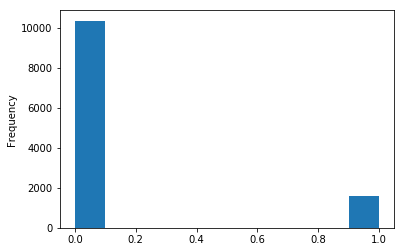

In [84]:
label.plot(kind='hist')

In [85]:
import numpy as np
from sklearn.utils import class_weight

 
class_weight1 =class_weight.compute_class_weight('balanced',np.unique(label),label)
weight=pd.DataFrame(class_weight1)
weight1=weight.to_dict()

weight=weight1[0]
weight

{0: 0.5771643663739021, 1: 3.7398373983739837}

## Create Dummy Variables For ML Models

In [86]:
source_dummies=pd.get_dummies(df4.creation_source, prefix='source').iloc[:,1:]
df4=pd.concat([df4,source_dummies], axis=1)

In [87]:
df4.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

## Train, Test Split for Catboost and Other ML Models
CB has categorical features that does its own one hot encoding

In [88]:
features=df2[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','login_count','days_to_adopt','interval_to_adopt','logins_to_adopt','month_created','last_session_creation_time']]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=42)

In [90]:
features_dum=df4[['source_ORG_INVITE','source_PERSONAL_PROJECTS','source_SIGNUP','source_SIGNUP_GOOGLE_AUTH','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','login_count','days_to_adopt','interval_to_adopt','logins_to_adopt','month_created','last_session_creation_time']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(features_dum, label, test_size=0.25, random_state=42)

In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11960 entries, 0 to 11999
Data columns (total 16 columns):
object_id                     11960 non-null int64
creation_time                 11960 non-null datetime64[ns]
name                          11960 non-null object
email                         11960 non-null object
creation_source               11960 non-null object
last_session_creation_time    11960 non-null float64
opted_in_to_mailing_list      11960 non-null int64
enabled_for_marketing_drip    11960 non-null int64
org_id                        11960 non-null int64
invited_by_user_id            6395 non-null float64
month_created                 11960 non-null int64
is_Adopt                      11960 non-null bool
login_count                   11960 non-null float64
days_to_adopt                 11960 non-null float64
interval_to_adopt             11960 non-null float64
logins_to_adopt               11960 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(6), int64

In [93]:
df2.login_count

0          0.0
1         14.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9        284.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
         ...  
11970      0.0
11971      0.0
11972      0.0
11973      0.0
11974    216.0
11975      0.0
11976      0.0
11977      0.0
11978      0.0
11979      8.0
11980      4.0
11981      0.0
11982      0.0
11983      0.0
11984      0.0
11985      0.0
11986      0.0
11987      0.0
11988      0.0
11989      0.0
11990      5.0
11991      0.0
11992      0.0
11993      0.0
11994      0.0
11995      0.0
11996      0.0
11997      0.0
11998      0.0
11999      0.0
Name: login_count, Length: 11960, dtype: float64

In [94]:
df4['org_id'].unique()

array([ 11,   1,  94, 193, 197,  37,  74, 302, 318,  69, 130, 254,   0,
       175, 211,   2,  58,  54,   7,   6, 123,  81,  56, 134,  92, 251,
       283,  98, 401,  33,  59, 109, 276, 208, 332,  64, 235,  63,  14,
         4, 127,  32, 224, 304,  61,  51, 229,  88, 325, 150, 347, 203,
        21, 409, 215, 141,   5, 107, 184, 310, 367, 389,  89, 242,  68,
        16,  49, 185,  91, 172,   8,  43, 249,  26, 139,  70,  10, 252,
        53, 119,   3, 196, 335, 375, 303, 307,  25, 370,  83,  27, 306,
       118, 295,  19, 301, 100, 112, 263,  39,  12,  86, 402,  42, 103,
       373, 268,  30, 406,  48, 313,   9, 138, 261,  35, 264,  95,  55,
        60, 234,  28, 410, 170, 374,  15,  17, 364,  62, 244, 342, 225,
       121, 255, 411, 217, 165, 415, 104, 329, 278, 116, 151, 290, 200,
       187, 122, 353, 135, 328,  36,  13, 341, 349, 198, 153, 108,  77,
       142, 275, 176,  87, 191, 102, 245, 154, 218, 385,  76, 321, 159,
       371,  50,  75, 333, 137, 292, 286, 131, 178, 213, 376, 36

## Correlation Map

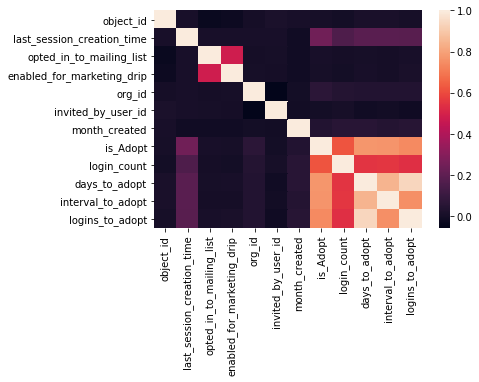

In [95]:
import seaborn as sns
sns.heatmap(df2.corr())

## RFC Classifier

In [97]:
#rfc.fit(X_train,y_train)
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42,n_jobs=-1,class_weight=weight)

params_rf = {'n_estimators':[20,30,40],
               'min_samples_leaf':[2,3], 'min_samples_split':[2,3],
            'min_weight_fraction_leaf':[0.0,0.1],'min_impurity_decrease':[0.0,0.1,0.2]       
                }


# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rfc,
                       param_grid=params_rf,
                       cv=5,
                       verbose=1,
                       n_jobs=-1)


grid_rf.fit(X_train1, y_train1) 

# Extract the best estimator
best_model_rf = grid_rf.best_estimator_

# Predict test set labels
ypred = best_model_rf.predict(X_test1)

# Compute rmse_test
#rmse_test = MSE(ytest,ypred)**(0.5)

# Print rmse_test
#print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print('Best score: {:.3f}'.format(grid_rf.best_score_)) 


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   16.4s finished


Best score: 0.991


In [98]:
accuracy_score(ypred,y_test1)

0.9899665551839465

In [99]:
confusion_matrix(ypred,y_test1)

array([[2601,   29],
       [   1,  359]], dtype=int64)

In [100]:
roc_auc_score(ypred,y_test)

0.9930978031263202

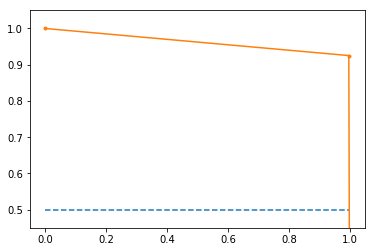

0.9614072011707601


In [102]:
import matplotlib.pyplot as plt
precision1, recall1, thresholds1 = precision_recall_curve(ypred,y_test1)


# calculate precision-recall AUC
auc1 = auc(recall1, precision1)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall1, precision1, marker='.')
plt.ylim(0.45,1.05)
# show the plot
plt.show()
print(auc1)

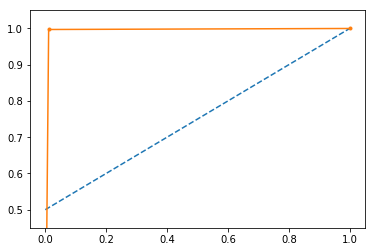

0.9930978031263202


In [103]:
x1, y1, thresholds1 = roc_curve(ypred,y_test1)


# calculate precision-recall AUC
auc1 = auc(x1, y1)
plt.plot([0, 1], [0.5, 1], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(x1, y1, marker='.')
plt.ylim(0.45,1.05)
# show the plot
plt.show()
print(auc1)

In [105]:
best_model_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True,
            class_weight={0: 0.5771643663739021, 1: 3.7398373983739837},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)>

## Catboost Classifier

In [106]:
from catboost import CatBoostClassifier

In [107]:
cb = CatBoostClassifier(learning_rate=0.15, depth=4,l2_leaf_reg=0.2,subsample=None,
    sampling_unit=None, max_depth=None, n_estimators=100)

categorical_feature_indices = [0,1,2,3]
                  
              
              

cb.fit(X_train, y_train,cat_features=categorical_feature_indices,  eval_set = (X_test,y_test), plot = True)
cb_pred=cb.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,cb_pred)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4300165	test: 0.4305649	best: 0.4305649 (0)	total: 69.7ms	remaining: 6.9s
1:	learn: 0.2824184	test: 0.2818563	best: 0.2818563 (1)	total: 84.8ms	remaining: 4.15s
2:	learn: 0.2009808	test: 0.2002403	best: 0.2002403 (2)	total: 98.6ms	remaining: 3.19s
3:	learn: 0.1474526	test: 0.1465571	best: 0.1465571 (3)	total: 116ms	remaining: 2.79s
4:	learn: 0.1052191	test: 0.1060217	best: 0.1060217 (4)	total: 131ms	remaining: 2.48s
5:	learn: 0.0831375	test: 0.0851692	best: 0.0851692 (5)	total: 145ms	remaining: 2.26s
6:	learn: 0.0690704	test: 0.0710993	best: 0.0710993 (6)	total: 160ms	remaining: 2.12s
7:	learn: 0.0644085	test: 0.0665069	best: 0.0665069 (7)	total: 171ms	remaining: 1.97s
8:	learn: 0.0611854	test: 0.0634145	best: 0.0634145 (8)	total: 184ms	remaining: 1.86s
9:	learn: 0.0532778	test: 0.0560208	best: 0.0560208 (9)	total: 200ms	remaining: 1.8s
10:	learn: 0.0493293	test: 0.0527303	best: 0.0527303 (10)	total: 214ms	remaining: 1.73s
11:	learn: 0.0455451	test: 0.0493451	best: 0.049345

94:	learn: 0.0254483	test: 0.0367948	best: 0.0367948 (94)	total: 1.56s	remaining: 82.3ms
95:	learn: 0.0254303	test: 0.0367849	best: 0.0367849 (95)	total: 1.58s	remaining: 65.9ms
96:	learn: 0.0252743	test: 0.0365620	best: 0.0365620 (96)	total: 1.6s	remaining: 49.4ms
97:	learn: 0.0252511	test: 0.0365369	best: 0.0365369 (97)	total: 1.61s	remaining: 33ms
98:	learn: 0.0249257	test: 0.0365583	best: 0.0365369 (97)	total: 1.63s	remaining: 16.5ms
99:	learn: 0.0247220	test: 0.0364414	best: 0.0364414 (99)	total: 1.64s	remaining: 0us

bestTest = 0.03644143332
bestIteration = 99



0.9926421404682274

In [108]:
roc_auc_score(cb_pred,y_test)

0.9946367276887873

In [109]:
cb.get_feature_importance()

[0.6479783196103642,
 0.43665031508714774,
 0.09401266894848685,
 4.7808472829278035,
 5.498206345116218,
 13.564312455130962,
 0.4540389785532334,
 34.65073498224208,
 10.353823924909657,
 29.51939472747397]

In [110]:

cb = CatBoostClassifier(class_weights=[0.5771643663739,3.73983739837398])
    
categorical_feature_indices = [0,1,2,3]   

params_cb = {'n_estimators':[1,2,5,40,50]      

            }
              

# Instantiate grid_rf
grid_cb = GridSearchCV(estimator=cb,
                       param_grid=params_cb,
                       cv=5,
                       verbose=1,
                       n_jobs=-1)


grid_cb.fit(X_train, y_train,cat_features=categorical_feature_indices,eval_set = (X_test,y_test)) 

# Extract the best estimator
best_model_cb = grid_cb.best_estimator_

# Predict test set labels
ypred = best_model_cb.predict(X_test)

print('Best score: {:.3f}'.format(grid_cb.best_score_)) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.7s finished


Learning rate set to 0.389594
0:	learn: 0.2297614	test: 0.2344834	best: 0.2344834 (0)	total: 21.9ms	remaining: 854ms
1:	learn: 0.1511854	test: 0.1601860	best: 0.1601860 (1)	total: 37.5ms	remaining: 713ms
2:	learn: 0.1030153	test: 0.1169810	best: 0.1169810 (2)	total: 60.6ms	remaining: 747ms
3:	learn: 0.0995215	test: 0.1143503	best: 0.1143503 (3)	total: 77.1ms	remaining: 694ms
4:	learn: 0.0971306	test: 0.1129009	best: 0.1129009 (4)	total: 98.6ms	remaining: 690ms
5:	learn: 0.0882956	test: 0.1045400	best: 0.1045400 (5)	total: 121ms	remaining: 688ms
6:	learn: 0.0832553	test: 0.1010192	best: 0.1010192 (6)	total: 144ms	remaining: 677ms
7:	learn: 0.0815140	test: 0.1030555	best: 0.1010192 (6)	total: 170ms	remaining: 681ms
8:	learn: 0.0806066	test: 0.1037193	best: 0.1010192 (6)	total: 200ms	remaining: 689ms
9:	learn: 0.0780139	test: 0.1027977	best: 0.1010192 (6)	total: 222ms	remaining: 666ms
10:	learn: 0.0778059	test: 0.1028722	best: 0.1010192 (6)	total: 239ms	remaining: 631ms
11:	learn: 0.07738

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,y_test)

0.9923076923076923

In [112]:
confusion_matrix(ypred,y_test)

array([[2597,   18],
       [   5,  370]], dtype=int64)

In [113]:
roc_auc_score(ypred,y_test)

0.9898916507329509

In [114]:
grid_cb.best_estimator_.get_params()

{'loss_function': 'Logloss',
 'class_weights': [0.5771643663739, 3.73983739837398],
 'n_estimators': 40}

## Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight=weight,max_iter=1000)



C=[0.001,0.05,0.1,0.5]
params_lr = {'C':C, 'penalty': ['l1'],
                'tol': [1e-10], 'solver': ['liblinear']
                #, 'learning_rate':[0.15,0.2,0.25], 'depth':[4,6,8,10,12],'l2_leaf_reg':[0.005,0.1,0.2]
            }


# Instantiate grid_rf
grid_lr = GridSearchCV(estimator=lr,
                       param_grid=params_lr,scoring='neg_log_loss',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)


grid_lr.fit(X_train1, y_train1) 

# Extract the best estimator
best_model_lr = grid_lr.best_estimator_

# Predict test set labels
ypred = best_model_lr.predict(X_test1)

# Compute rmse_test
#rmse_test = MSE(ytest,ypred)**(0.5)

# Print rmse_test
#print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print('Best score: {:.3f}'.format(grid_lr.best_score_)) 


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  1.0min remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.0min finished


Best score: -0.127


C:\Users\Aytu\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [116]:
best_model_lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.5,
          class_weight={0: 0.5771643663739021, 1: 3.7398373983739837},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=1000, multi_class='warn', n_jobs=None, penalty='l1',
          random_state=None, solver='liblinear', tol=1e-10, verbose=0,
          warm_start=False)>

In [117]:
accuracy_score(ypred,y_test1)

0.98561872909699

In [118]:
confusion_matrix(ypred,y_test1)

array([[2602,   43],
       [   0,  345]], dtype=int64)

In [119]:
len(label)

11960

## SVC Classifier

In [120]:
from sklearn.svm import SVC

In [123]:

svc=SVC(class_weight=weight)
C=np.arange(1,100,2)
C=[0.001,0.05,0.1,0.5,1,2]
params_sv = {'C':C, 'gamma':[1e-15,1e-10,0.00001,0.001,0.05,0.1]      
                #, 'learning_rate':[0.15,0.2,0.25], 'depth':[4,6,8,10,12],'l2_leaf_reg':[0.005,0.1,0.2]
            }


# Instantiate grid_rf
grid_sv = GridSearchCV(estimator=svc,
                       param_grid=params_sv,scoring='f1',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)


grid_sv.fit(X_train1, y_train1) 

# Extract the best estimator
best_model_sv = grid_sv.best_estimator_

# Predict test set labels
ypred = best_model_sv.predict(X_test1)

# Compute rmse_test
#rmse_test = MSE(ytest,ypred)**(0.5)

# Print rmse_test
#print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print('Best score: {:.3f}'.format(grid_sv.best_score_)) 

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   48.4s finished


Best score: 0.714


In [124]:
roc_auc_score(ypred,y_test1)

0.8199130593755712

In [125]:
confusion_matrix(ypred,y_test1)

array([[2476,  115],
       [ 126,  273]], dtype=int64)

In [126]:
ypred

array([1, 0, 0, ..., 0, 0, 1])

In [128]:
best_model_sv.get_params

<bound method BaseEstimator.get_params of SVC(C=0.05, cache_size=200,
  class_weight={0: 0.5771643663739021, 1: 3.7398373983739837}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

# Feature Importances

In [161]:
cb_feat=best_model_cb.get_feature_importance()
cb_feat

[3.8808678374391534,
 2.339131731229718,
 0.5817753256864697,
 11.66310180137034,
 5.474161176301613,
 19.949264682851695,
 4.907314225301709,
 1.6685546561622486,
 13.896764347217076,
 35.63906421643998]

In [160]:
feat=features.columns.values
feat

array(['creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'login_count',
       'days_to_adopt', 'interval_to_adopt', 'logins_to_adopt',
       'month_created', 'last_session_creation_time'], dtype=object)

In [162]:
cb_imp=zip(cb_feat,feat)
cb_imp = [*cb_imp]
#cb_imp =sorted(cb_imp,reverse=False)

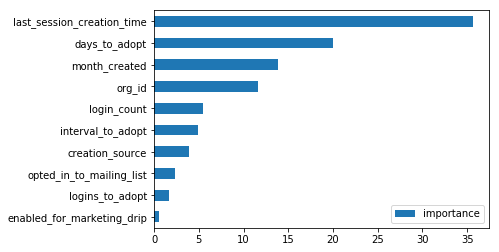

In [232]:
cb_df=pd.DataFrame(cb_feat,index=feat)#
cb_df.columns=['importance']
#cb_df.rename(columns={0:'importance'},inplace=True)#.columns.values
cb_df.sort_values(by='importance',inplace=True,ascending=True)
cb_df.plot(kind='barh',sort_columns=True)

In [233]:
rf_feat=best_model_rf.feature_importances_

In [236]:
feat_dum=features_dum.columns
feat_dum

Index(['source_ORG_INVITE', 'source_PERSONAL_PROJECTS', 'source_SIGNUP',
       'source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'login_count', 'days_to_adopt',
       'interval_to_adopt', 'logins_to_adopt', 'month_created',
       'last_session_creation_time'],
      dtype='object')

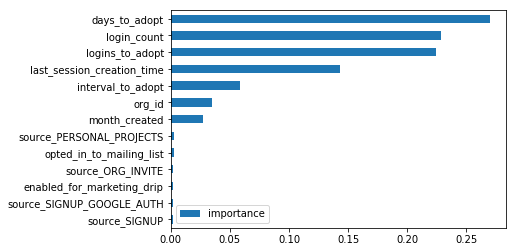

In [237]:
rf_df=pd.DataFrame(rf_feat,index=feat_dum)#
rf_df.columns=['importance']
#cb_df.rename(columns={0:'importance'},inplace=True)#.columns.values
rf_df.sort_values(by='importance',inplace=True,ascending=True)
rf_df.plot(kind='barh',sort_columns=True)